In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


C:\Users\1000 MEEZA\AppData\Local\Temp\ipykernel_12996\1227179012.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('healthcare_dataset.csv')

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# تحويل عمود 'Date of Admission' و 'Discharge Date' إلى صيغة تاريخية
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# حساب عدد الأيام التي قضاها المريض في المستشفى
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# بعد ذلك يمكنك تقسيم التواريخ إلى مكونات اليوم، الشهر، والسنة إذا كنت بحاجة لذلك
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

# يمكنك بعد ذلك حذف التواريخ الأصلية إذا لم تكن بحاجة إليها
df = df.drop(columns=['Date of Admission', 'Discharge Date'])

# عرض أول بضعة أسطر للتحقق من النتائج
df[['Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month', 'Discharge Year', 'Length of Stay']].head()


,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Length of Stay
0,31,1,2024,2,2,2024,2
1,20,8,2019,26,8,2019,6
2,22,9,2022,7,10,2022,15
3,18,11,2020,18,12,2020,30
4,19,9,2022,9,10,2022,20


In [6]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year
0,Bobby JacksOn,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2,31,1,2024,2,2,2024
1,LesLie TErRy,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6,20,8,2019,26,8,2019
2,DaNnY sMitH,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15,22,9,2022,7,10,2022
3,andrEw waTtS,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30,18,11,2020,18,12,2020
4,adrIENNE bEll,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20,19,9,2022,9,10,2022


In [7]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

Gender_label_encoder = LabelEncoder()
Gender_label_encoder.fit(['Male', 'Female'])
df["Gender"] = Gender_label_encoder.transform(df["Gender"])

from sklearn.preprocessing import LabelEncoder
df["Blood Type"] = LabelEncoder().fit_transform(df["Blood Type"])

from sklearn.preprocessing import LabelEncoder
df["Medical Condition"] = LabelEncoder().fit_transform(df["Medical Condition"])

from sklearn.preprocessing import LabelEncoder
df["Insurance Provider"] = LabelEncoder().fit_transform(df["Insurance Provider"])

from sklearn.preprocessing import LabelEncoder
df["Admission Type"] = LabelEncoder().fit_transform(df["Admission Type"])

from sklearn.preprocessing import LabelEncoder
df["Medication"] = LabelEncoder().fit_transform(df["Medication"])

from sklearn.preprocessing import LabelEncoder
df["Test Results"] = LabelEncoder().fit_transform(df["Test Results"])



In [9]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year
0,Bobby JacksOn,30,1,5,2,Matthew Smith,Sons and Miller,1,18856.281306,328,2,3,2,2,31,1,2024,2,2,2024
1,LesLie TErRy,62,1,0,5,Samantha Davies,Kim Inc,3,33643.327287,265,1,1,1,6,20,8,2019,26,8,2019
2,DaNnY sMitH,76,0,1,5,Tiffany Mitchell,Cook PLC,0,27955.096079,205,1,0,2,15,22,9,2022,7,10,2022
3,andrEw waTtS,28,0,6,3,Kevin Wells,"Hernandez Rogers and Vang,",3,37909.782410,450,0,1,0,30,18,11,2020,18,12,2020
4,adrIENNE bEll,43,0,2,2,Kathleen Hanna,White-White,0,14238.317814,458,2,4,0,20,19,9,2022,9,10,2022


# logistic regression

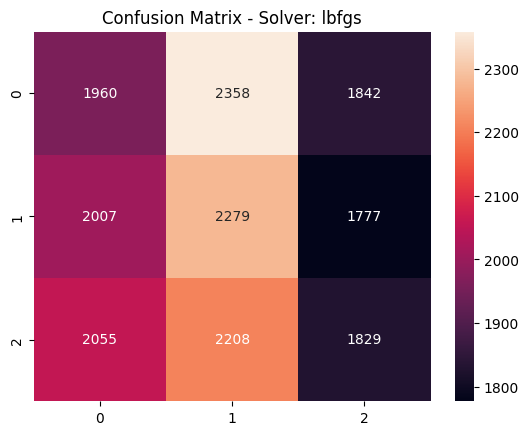

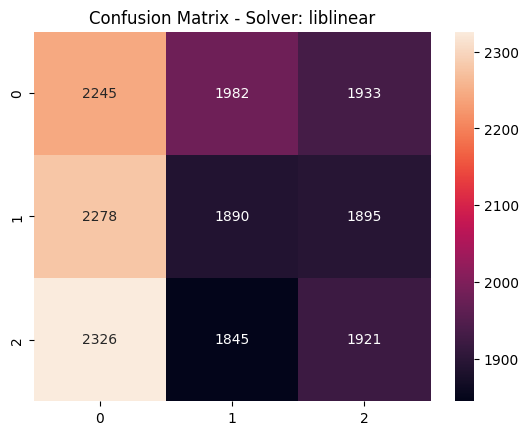

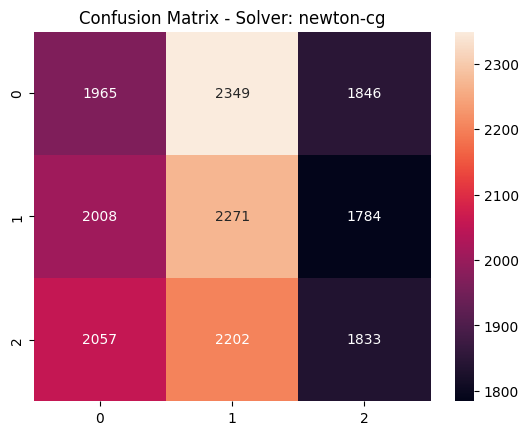

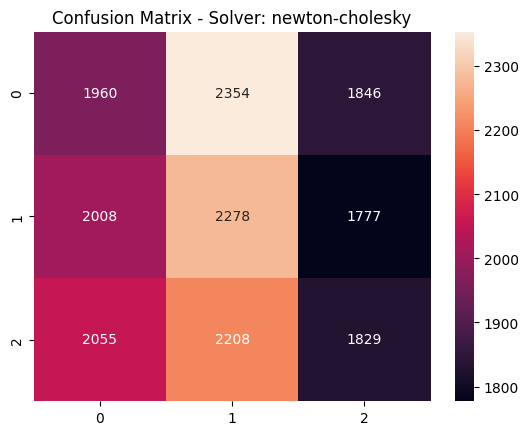

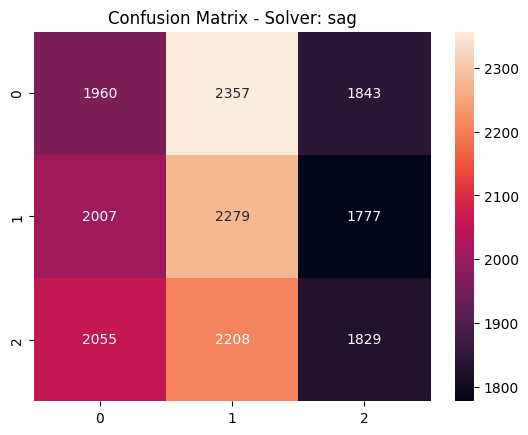

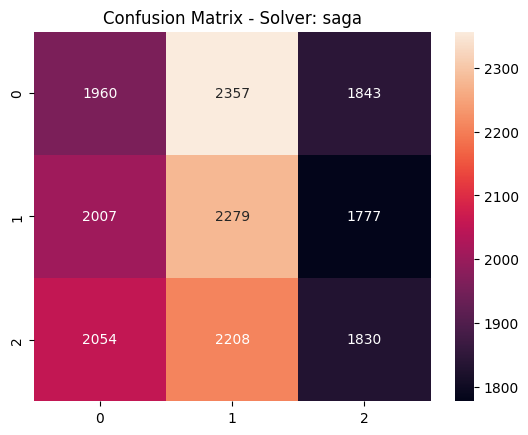

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.33      0.32      0.32      6160
           1       0.33      0.38      0.35      6063
           2       0.34      0.30      0.32      6092

    accuracy                           0.33     18315
   macro avg       0.33      0.33      0.33     18315
weighted avg       0.33      0.33      0.33     18315

Solver: liblinear
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      6160
           1       0.33      0.31      0.32      6063
           2       0.33      0.32      0.32      6092

    accuracy                           0.33     18315
   macro avg       0.33      0.33      0.33     18315
weighted avg       0.33      0.33      0.33     18315

Solver: newton-cg
              precision    recall  f1-score   support

           0       0.33      0.32      0.32      6160
           1       0.33      0.37      0.35      6063
           2       0.34  

In [10]:
#cdf = df [['Age','Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Billing Amount','Length of Stay']]
#cdf.head()

X = df[['Age', 'Gender', 'Medical Condition', 'Length of Stay', 'Admission Type', 'Medication']].to_numpy()
y = df["Test Results"].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the solvers
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

results = {}

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for solver in solvers:
    LR_model = LogisticRegression(solver=solver, class_weight='balanced', max_iter=1000, C=1.0)
    LR_model.fit(X_train_scaled, y_train)
    predictions = LR_model.predict(X_test_scaled)
    predictions_probability = LR_model.predict_proba(X_test_scaled)
    cf_matrix = confusion_matrix(y_test, predictions)

    results[solver] = {
        "classification_report": classification_report(y_test, predictions),
        "confusion_matrix": cf_matrix
    }

    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    plt.title(f"Confusion Matrix - Solver: {solver}")
    plt.show()

# Print classification reports for each solver
for solver, result in results.items():
    print(f"Solver: {solver}")
    print(result["classification_report"])


# desition tree

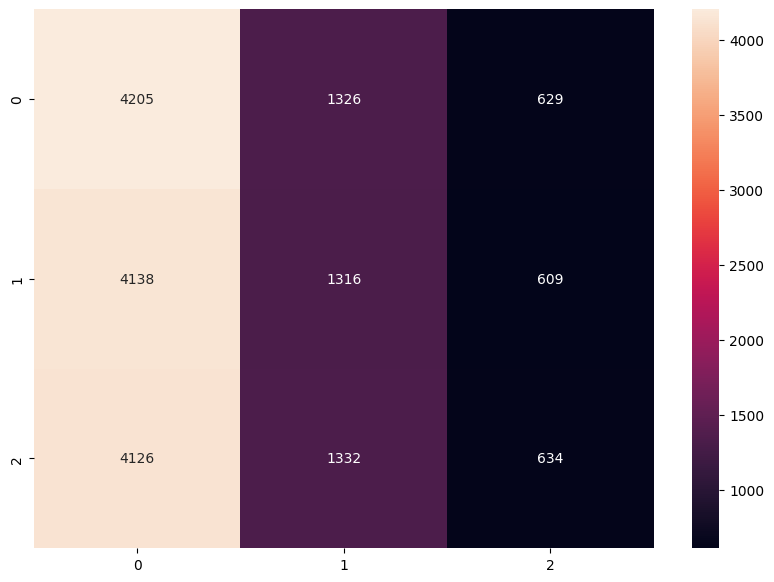

gini:
              precision    recall  f1-score   support

           0       0.34      0.68      0.45      6160
           1       0.33      0.22      0.26      6063
           2       0.34      0.10      0.16      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.33      0.29     18315
weighted avg       0.34      0.34      0.29     18315





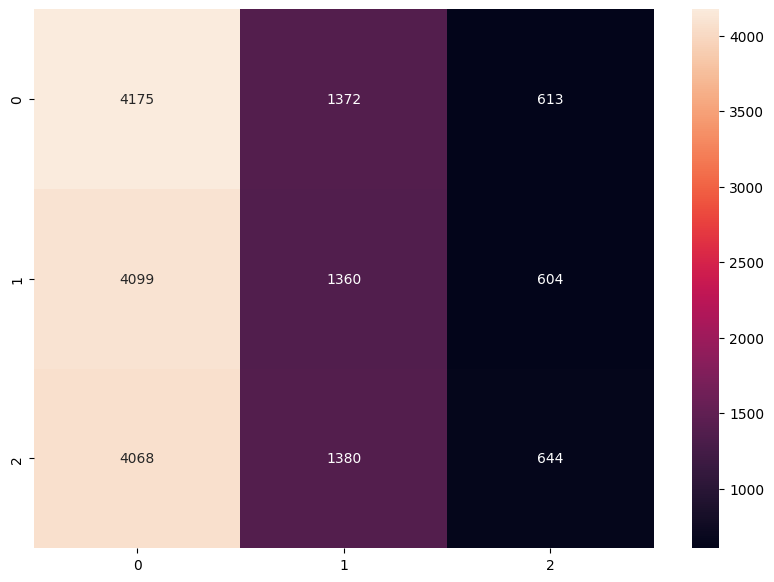

entropy:
              precision    recall  f1-score   support

           0       0.34      0.68      0.45      6160
           1       0.33      0.22      0.27      6063
           2       0.35      0.11      0.16      6092

    accuracy                           0.34     18315
   macro avg       0.34      0.34      0.29     18315
weighted avg       0.34      0.34      0.29     18315





In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[['Age', 'Gender', 'Medical Condition', 'Length of Stay', 'Admission Type', 'Medication']].to_numpy()
y = df["Test Results"].to_numpy()

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

solver_list = ['gini', 'entropy'] 

for solver in solver_list:
    tree_model = DecisionTreeClassifier(criterion=solver, max_depth=7)
    tree_model.fit(X_train, y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f')
    plt.show()  # Show the heatmap
    
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)
    print("\n")

# randoum forest

[1 1 0 2 2 2 2 2 0]
[0 1 2 2 0 1 0 2 0]


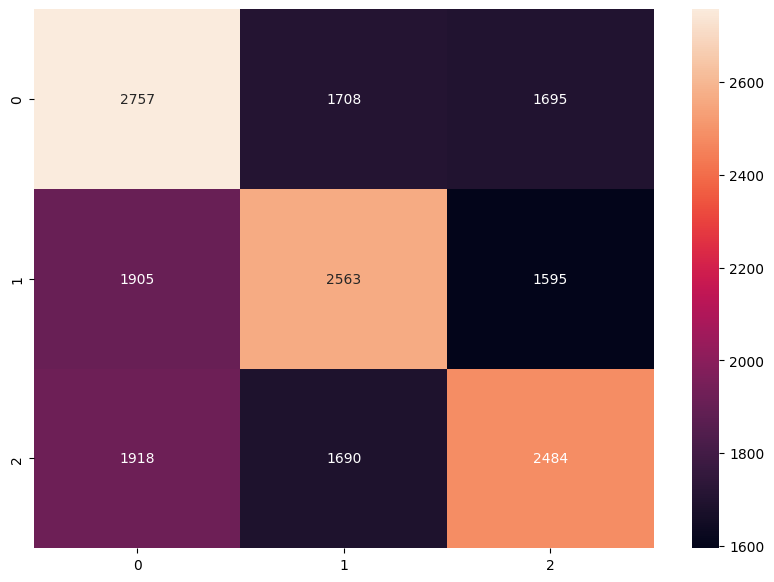

              precision    recall  f1-score   support

           0       0.42      0.45      0.43      6160
           1       0.43      0.42      0.43      6063
           2       0.43      0.41      0.42      6092

    accuracy                           0.43     18315
   macro avg       0.43      0.43      0.43     18315
weighted avg       0.43      0.43      0.43     18315



In [12]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year','Discharge Day','Discharge Month','Discharge Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

from sklearn.ensemble import RandomForestClassifier
tree_model = RandomForestClassifier(criterion='gini',n_estimators=43,max_depth=None).fit(X_train,y_train) 
tree_model

predictions = tree_model.predict(X_test)
print(predictions[1:10])
print(y_test[1:10])

import seaborn as sns
from sklearn.metrics import confusion_matrix
criterion = 'gini'
tree_model = RandomForestClassifier(criterion=criterion,n_estimators=43,max_depth=None)
tree_model.fit(X_train,y_train)
predictions = tree_model.predict(X_test)
predictions_probabilty = tree_model.predict_proba(X_test)

cf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix,annot=True,fmt='.0f')
plt.show()

csr = classification_report(y_test,predictions)
print (csr)


In [13]:
import pickle

with open('RF.pkl', 'wb') as model_pkl:
    pickle.dump(tree_model, model_pkl)



In [14]:
with open('RF.pkl', 'rb') as model_pkl:
    mp = pickle.load(model_pkl)

In [15]:
mp.score(X_test, y_test)

0.4260988260988261

# NN


c:\Users\1000 MEEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 532,483 (2.03 MB)

 Trainable params: 532,483 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3283 - loss: 32.9079 - val_accuracy: 0.3313 - val_loss: 3.0996
Epoch 2/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3349 - loss: 2.2452 - val_accuracy: 0.3337 - val_loss: 1.4977
Epoch 3/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3359 - loss: 1.3515 - val_accuracy: 0.3313 - val_loss: 1.3890
Epoch 4/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3378 - loss: 1.2667 - val_accuracy: 0.3313 - val_loss: 1.2110
Epoch 5/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3288 - loss: 1.1665 - val_accuracy: 0.3349 - val_loss: 1.1108
Epoch 6/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3333 - loss: 1.1438 - val_accuracy: 0.3313 - val_loss: 1.1126
Epoch 7/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3357 - loss: 1.1201 - val_accuracy: 0.3349 - val_loss: 1.0986
Epoch 8/60
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3320 - loss: 1.0987 - val_accuracy: 0

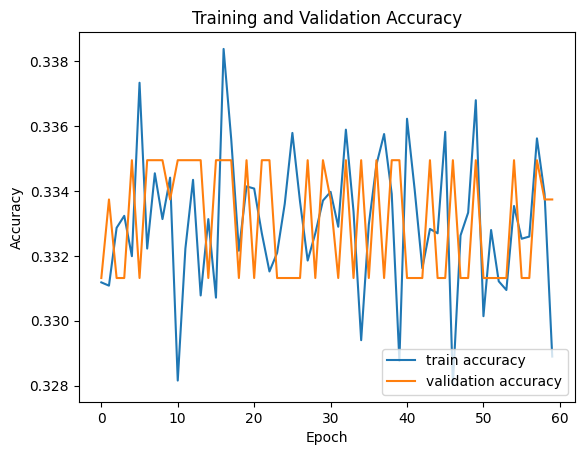

573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


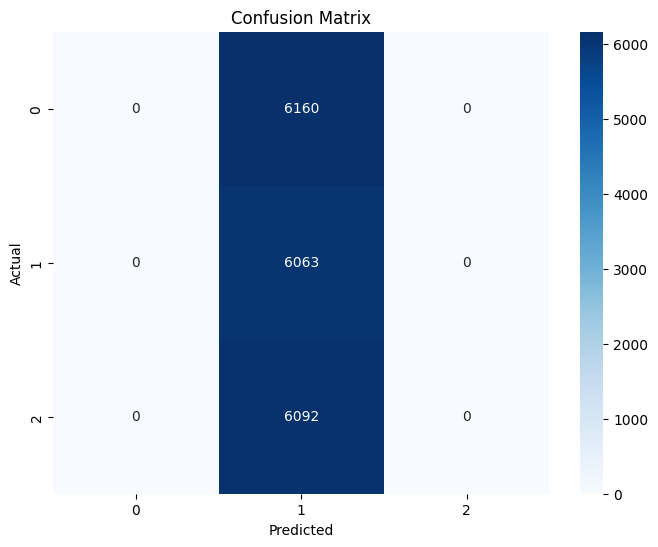

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6160
           1       0.33      1.00      0.50      6063
           2       0.00      0.00      0.00      6092

    accuracy                           0.33     18315
   macro avg       0.11      0.33      0.17     18315
weighted avg       0.11      0.33      0.16     18315

AUC: 0.50


c:\Users\1000 MEEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\1000 MEEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\1000 MEEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

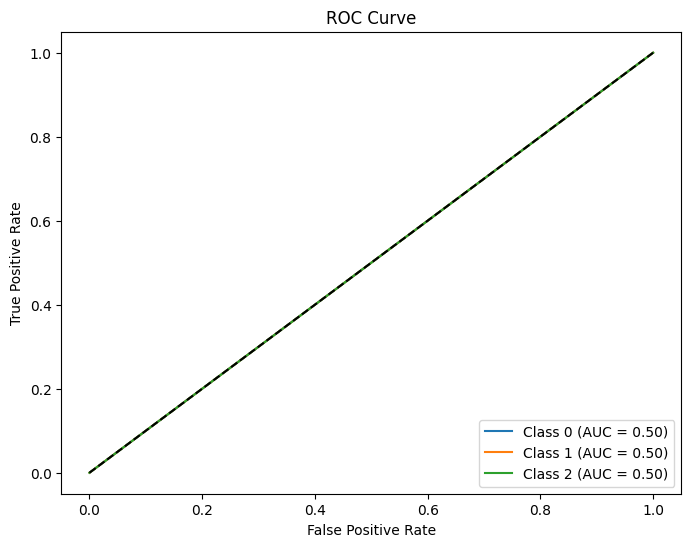

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Splitting the data
X = df[['Medical Condition','Admission Type','Age', 'Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, shuffle=True)

# Define the model
model = Sequential()
ncols = X_train.shape[1]

model.add(Dense(1024, input_shape=(ncols,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(units=3, activation="softmax"))  # 3 units for 3 classes with softmax activation

model.summary()

# Compile the model
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
epochs = 60
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=True)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plot training history
plt.plot(hist['accuracy'], label='train accuracy')
plt.plot(hist['val_accuracy'], label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the test set
y_pred_prob = model.predict(X_test)

# Ensure predicted probabilities sum to 1 across classes for each sample
assert np.allclose(np.sum(y_pred_prob, axis=1), 1), "The predicted probabilities do not sum to 1."

# Get the predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Assuming y_test contains class labels like [0, 1, 2] for a multi-class problem
num_classes = y_pred_prob.shape[1]

# Binarize y_test for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Calculate AUC using 'ovr' for multi-class classification
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


اخر حاجه خلاص والله

Accuracy: 0.3464373464373464
Confusion Matrix:
[[2311 1876 1973]
 [2201 1982 1880]
 [2145 1895 2052]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.36      6160
           1       0.34      0.33      0.34      6063
           2       0.35      0.34      0.34      6092

    accuracy                           0.35     18315
   macro avg       0.35      0.35      0.35     18315
weighted avg       0.35      0.35      0.35     18315

ROC AUC Score: 0.51


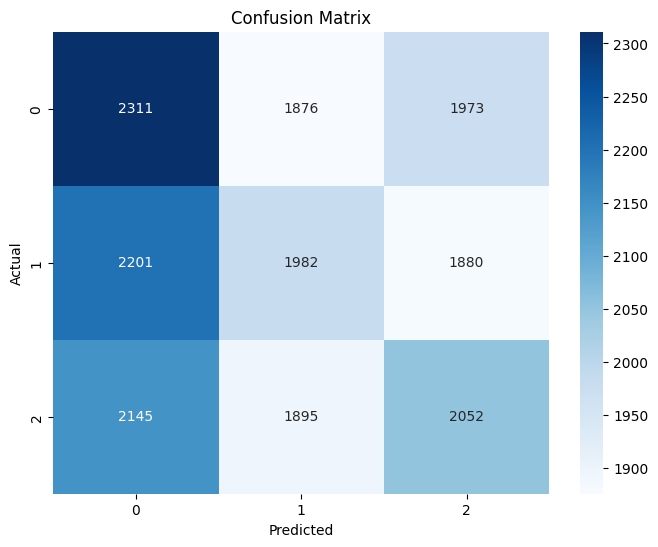

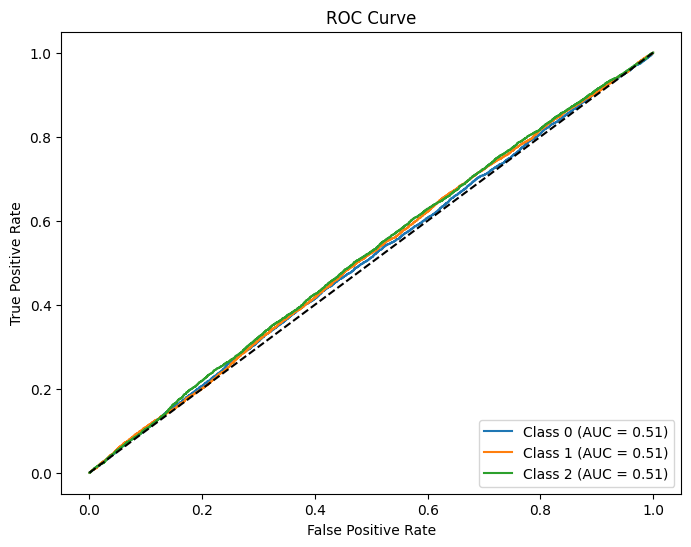

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# تجهيز البيانات
X = df[['Medical Condition', 'Length of Stay', 'Admission Type', 'Age', 'Admission Day', 'Admission Month', 'Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, shuffle=True)

# تدريب النموذج
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# عمل التوقعات
y_pred = model.predict(X_test)

# حساب مؤشرات الأداء
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# طباعة النتائج
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# رسم مصفوفة الارتباك
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# رسم منحنى ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(len(np.unique(y_test))))
fpr = dict()
tpr = dict()

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])

plt.figure(figsize=(8,6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
